<h1> Using Signal File: DMsimpl_spin0_Y0gg_1_MY0_1000_MXd_20_DeltaEta2.root </h1>

<h2> Imports </h2>

In [2]:
#import libraries
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import numpy as np
import uproot
from hist import Hist, axis

import sys
import os

# Add parent directory to sys.path
sys.path.append(os.path.abspath('/home/phenoprojects/VBFDM_Analysis/Analysis'))

import files_functions 
import plot_functions
import calculation_functions
import setup_variables


/home/phenoprojects/VBFDM_Analysis/Analysis/Analysis_new_files_v2


<h2> Find Data Files </h2>

In [3]:
luminescence = 300 #fb


#Signal Data
signal_dir = "/MC_Samples/SimplifiedModelsSignals/v2/"
signal_files = {    
            "DMsimpl_spin0_Y0gg_1_MY0_1000_MXd_20_DeltaEta2.root": 1.64749 * 1000, #times 1000 to convert from pb to fb
            }



#Background Data
background_dir = None #"/MC_Samples/"
background_folders = None# {  #"BKG_Wjets_WToLNu" : 47744.85 * 1000,
                       #"Wlnu_jets": 61082.51494 * 1000,
                      # "Znunu_jets": 12995.62137 * 1000}  


In [4]:

binning = {
    "PT": {"range": (20, 1000), "bins": 14},  # (300 - 20) / 20 = 14 bins
    "Eta*Eta": {"range": (-25, 25), "bins": 500},  # (25 - (-25)) / 0.1 = 500 bins
    "Delta_Eta": {"range": (0, 10), "bins": 100},  # (10 - 0) / 0.1 = 100 bins
    "Transverse": {"range": (0, 500), "bins": 100},  # (2000 - 500) / 20 = 75 bins
    "Eta": {"range": (-5, 5), "bins": 100},  # (5 - (-5)) / 0.1 = 100 bins
    "Phi": {"range": (-(np.pi), np.pi), "bins": 63}, 
    "Invariant": {"range": (50, 3000), "bins": 148}  # (3000 - 50) / 20 = 147.5, rounded to 148 bins
}



<h2> Retrieve and Store Weights </h2>

In [37]:
import importlib

importlib.reload(files_functions)

<module 'files_functions' from '/home/phenoprojects/VBFDM_Analysis/Analysis/files_functions.py'>

In [18]:
import os

print(os.listdir("/MC_Samples"))

['Wlnu_jets', 'SimplifiedModelsSignals', 'Znunu_jets', 'VBF_ML']


In [6]:
signal_weights = files_functions.get_signal_weights(signal_dir, signal_files,luminescence)
background_weights_W, background_weights_Z = None, None # files_functions.get_background_weights()

background_weightsWZ = [background_weights_W, background_weights_Z]

Directory:  /MC_Samples/SimplifiedModelsSignals/v2/
Files in directory: ['DMsimpl_spin0_Y0gg_1_MY0_100_MXd_20_DeltaEta2.root', 'DMsimpl_spin0_Y0gg_1_MY0_100_MXd_20.root', 'DMsimpl_spin0_Y0gg_1_MY0_1000_MXd_20_DeltaEta2.root']
file effective area {'DMsimpl_spin0_Y0gg_1_MY0_1000_MXd_20_DeltaEta2.root': 1647.49}
Effective area for file: 1647.49


<h1>  - - PLOTTING - - </h1>

<h2> Initial Plots without any Cuts </h2>

In [20]:
import importlib

importlib.reload(plot_functions)

<module 'plot_functions' from '/home/phenoprojects/VBFDM_Analysis/Analysis/plot_functions.py'>

In [ ]:
plot_functions.PlotSingleJet()

<h3> Plot MET </h3>

(493970.2216799996, 0.0, 0.0, 0.0)

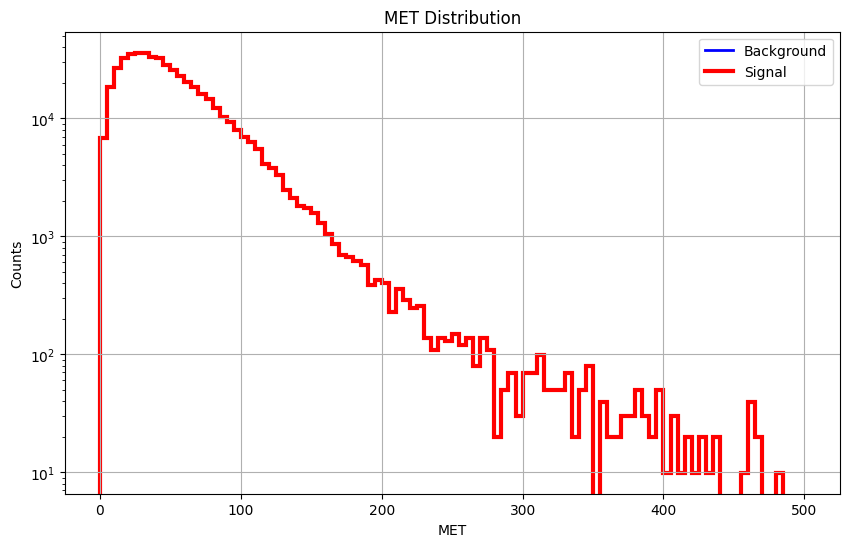

In [7]:
plot_functions.PlotMET(None,signal_weights,background_weightsWZ,"A1_PlotMet_noCuts",signal_dir,signal_files, background_dir, background_folders)

<h3> Plot PhiMet </h3>


(494246.99999999645, 0.0, 0.0, 0.0)

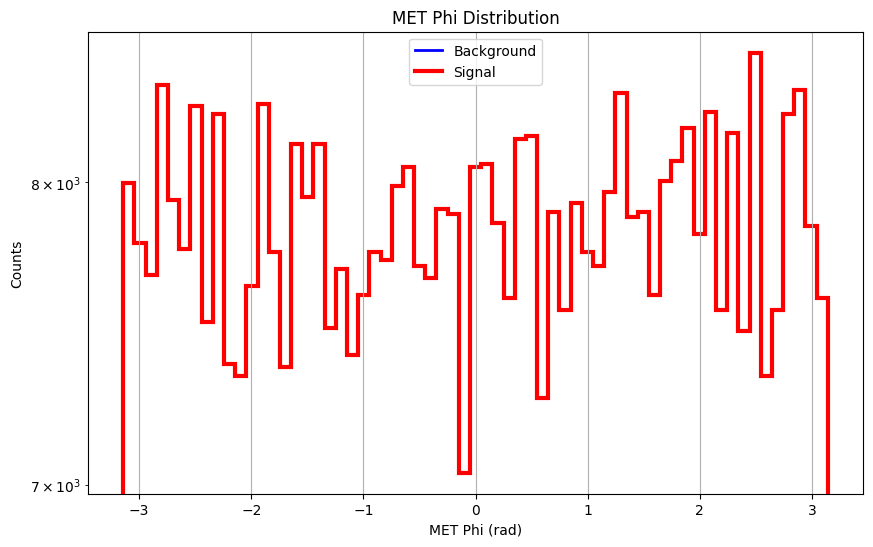

In [11]:
plot_functions.PlotPhiMet(None,signal_weights,background_weightsWZ,"A1_PlotPhiMet_noCuts",signal_dir,signal_files, background_dir, background_folders)


<h3> Plot PTJ0,J1 </h3>

(982157.753460163,
 0.0,
 [Hist(Regular(14, 20, 1000, name='thedata', label='PTJ0'), storage=Double()) # Sum: 489106.8312000746 (494247.00000007456 with flow),
  Hist(Regular(14, 20, 1000, name='thedata', label='PTJ0'), storage=Double())],
 [Hist(Regular(14, 20, 1000, name='thedata', label='PTJ1'), storage=Double()) # Sum: 493050.9222600884 (494247.00000008836 with flow),
  Hist(Regular(14, 20, 1000, name='thedata', label='PTJ1'), storage=Double())])

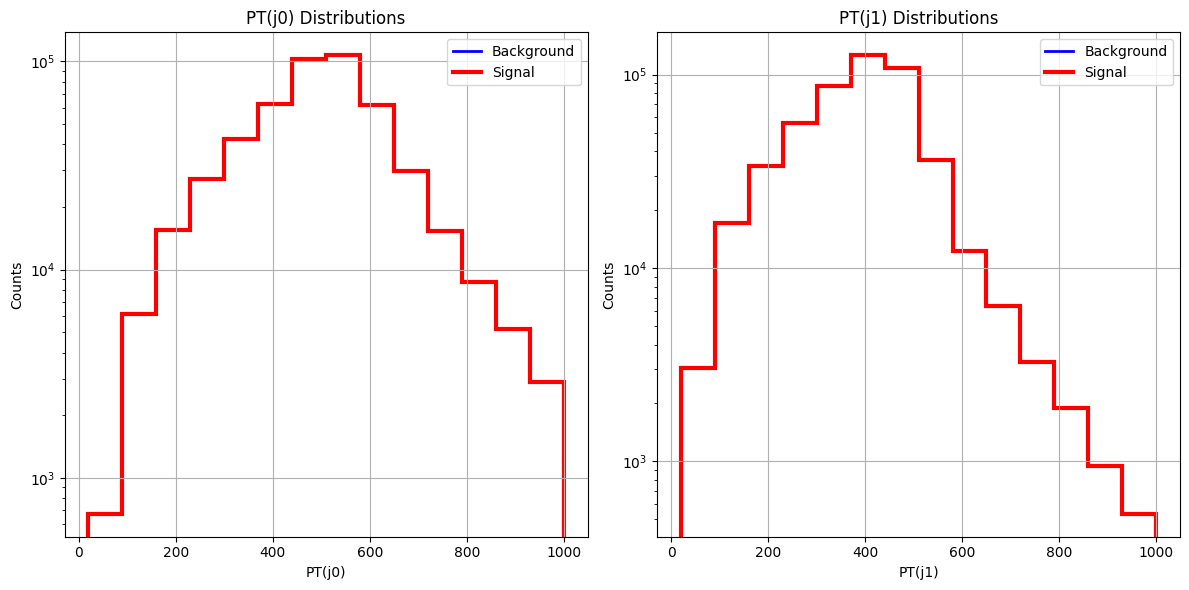

In [12]:
plot_functions.PlotJets("PT","PT",None,signal_weights,background_weightsWZ,"A1_PlotPTJets_noCuts", signal_dir,signal_files,background_dir,background_folders)

<h3> Plot PhiJ0,J1</h3>

(988493.9999999929,
 0.0,
 [Hist(Regular(63, -3.14159, 3.14159, name='thedata', label='PhiJ0'), storage=Double()) # Sum: 494246.99999999645,
  Hist(Regular(63, -3.14159, 3.14159, name='thedata', label='PhiJ0'), storage=Double())],
 [Hist(Regular(63, -3.14159, 3.14159, name='thedata', label='PhiJ1'), storage=Double()) # Sum: 494246.99999999645,
  Hist(Regular(63, -3.14159, 3.14159, name='thedata', label='PhiJ1'), storage=Double())])

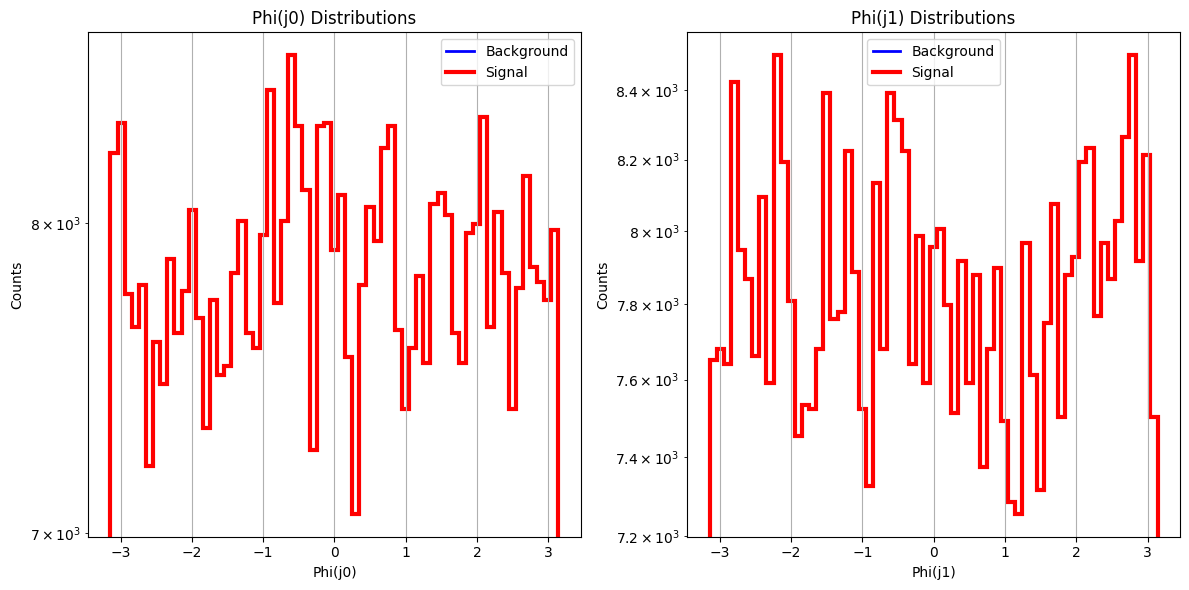

In [13]:
plot_functions.PlotJets("Phi","Phi",None,signal_weights,background_weightsWZ,"A1_PlotPhiJets_noCuts",signal_dir,signal_files,background_dir,background_folders)

<h3> Plot EtaJ0,J1 </h3>

(988493.9999999928,
 0.0,
 [Hist(Regular(100, -5, 5, name='thedata', label='EtaJ0'), storage=Double()) # Sum: 494246.9999999964,
  Hist(Regular(100, -5, 5, name='thedata', label='EtaJ0'), storage=Double())],
 [Hist(Regular(100, -5, 5, name='thedata', label='EtaJ1'), storage=Double()) # Sum: 494246.99999999645,
  Hist(Regular(100, -5, 5, name='thedata', label='EtaJ1'), storage=Double())])

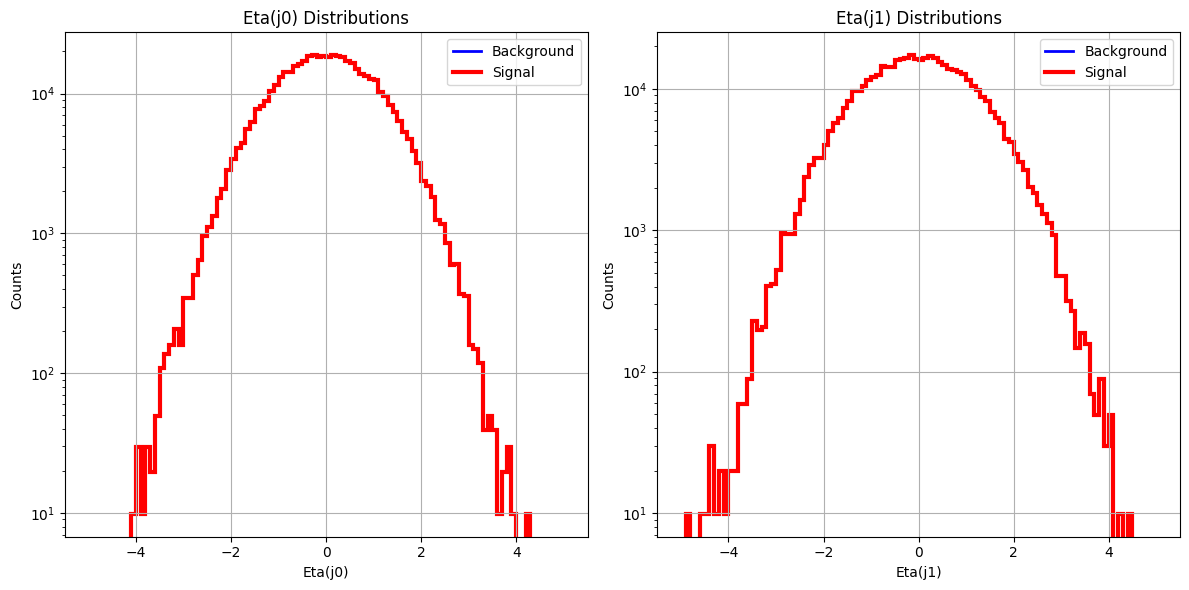

In [15]:
plot_functions.PlotJets("Eta","Eta",None,signal_weights,background_weightsWZ,"A1_PlotEtaJets_noCuts",signal_dir,signal_files,background_dir,background_folders)

<h3> Plot Eta(j0)*Eta(j1)</h3>

(Hist(Regular(500, -25, 25, name='Eta*Eta'), storage=Double()) # Sum: 494247.00000000704,
 Hist(Regular(500, -25, 25, name='Eta*Eta'), storage=Double()))

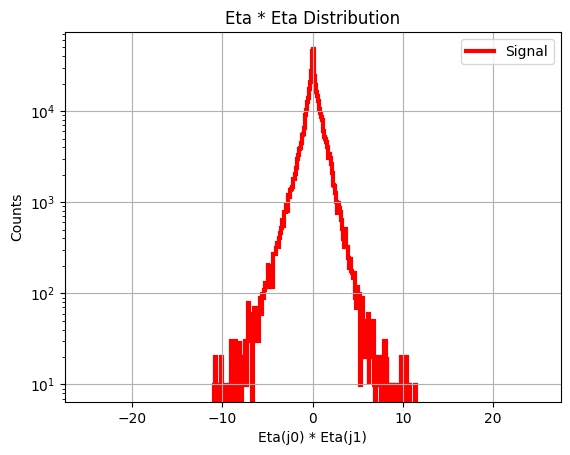

In [17]:
plot_functions.PlotEtaEta(None,signal_weights,background_weightsWZ,"A1_PlotEtaEtaJets_noCuts",signal_dir,signal_files, background_dir, background_folders)


<h3> Plot DeltaEta</h3>

(Hist(Regular(100, 0, 10, name='DeltaEta'), storage=Double()) # Sum: 494246.9999999962,
 Hist(Regular(100, 0, 10, name='DeltaEta'), storage=Double()))

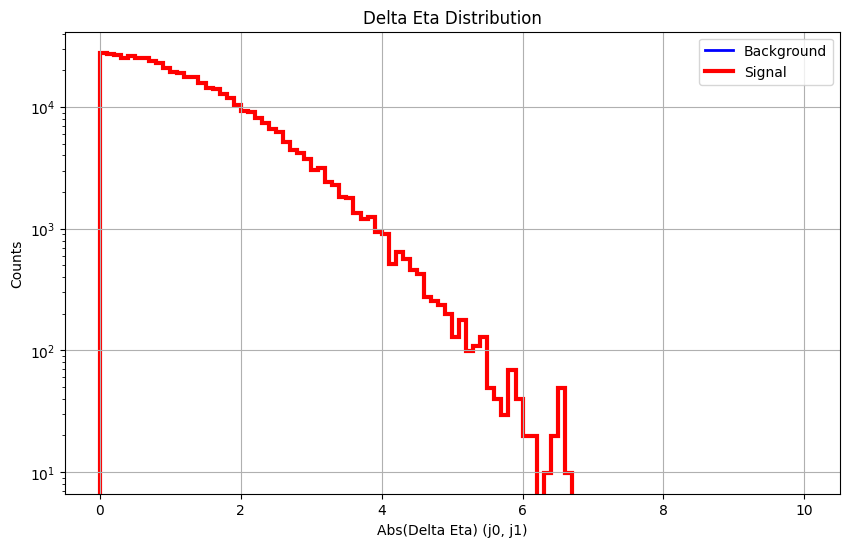

In [19]:
plot_functions.PlotDeltaEtaJets(None,signal_weights,background_weightsWZ,"A1_PlotDeltaEtaJets_noCuts",signal_dir,signal_files, background_dir, background_folders)

<h3> Plot InvariantMass </h3>

Plotting Invariant Mass


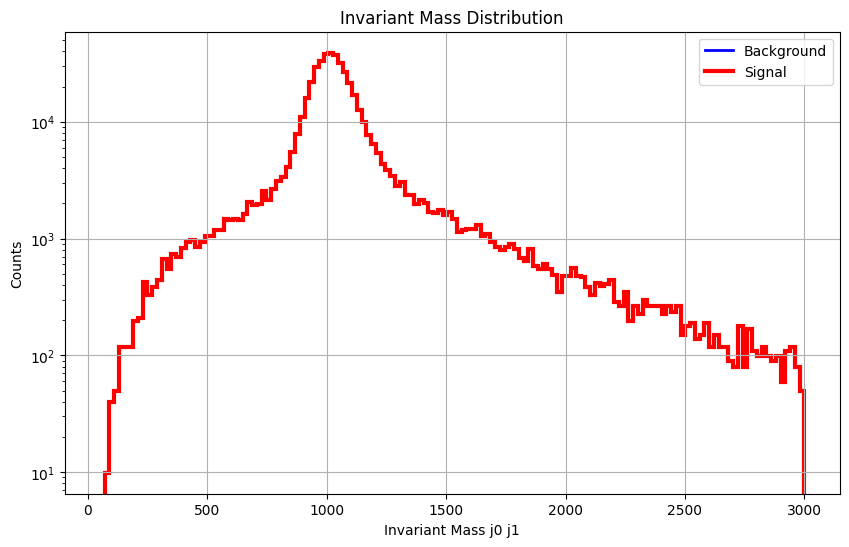

In [21]:
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents,_,_ = plot_functions.PlotInvariantMass(None,signal_weights,background_weightsWZ,"A1_PlotInvMass_noCuts",signal_dir,signal_files,background_dir,background_folders)


Plotting Invariant Mass
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


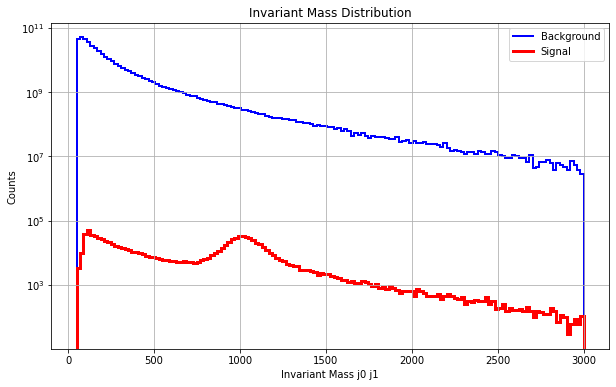

In [ ]:
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents,_,_ = plot_functions.PlotInvariantMass(None,signal_weights,background_weightsWZ,"A1_PlotInvMass_noCuts")


In [14]:
print("num bkg events:", currBkgEvents)
print("num z events:", numZBkgEvents)
print("num w events:", numWBkgEvents)

num bkg events: 366411272883.7246
num z events: 46754918810.181885
num w events: 319656354073.7253


<h1> Before Any Cuts </h1>

In [15]:
cuts_strings = []
Signal_numevents = []
Background_numevents = []
BkgW_numevents = []
BkgZ_numevents = []
significances = []

num_cuts = 0
maskList = []

In [16]:
import importlib

importlib.reload(plot_functions)

<module 'plot_functions' from '/home/phenoprojects/VBFDM_Analysis/Analysis/plot_functions.py'>

<h1> Optimize Cut Using PT(j0) <h1>

Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


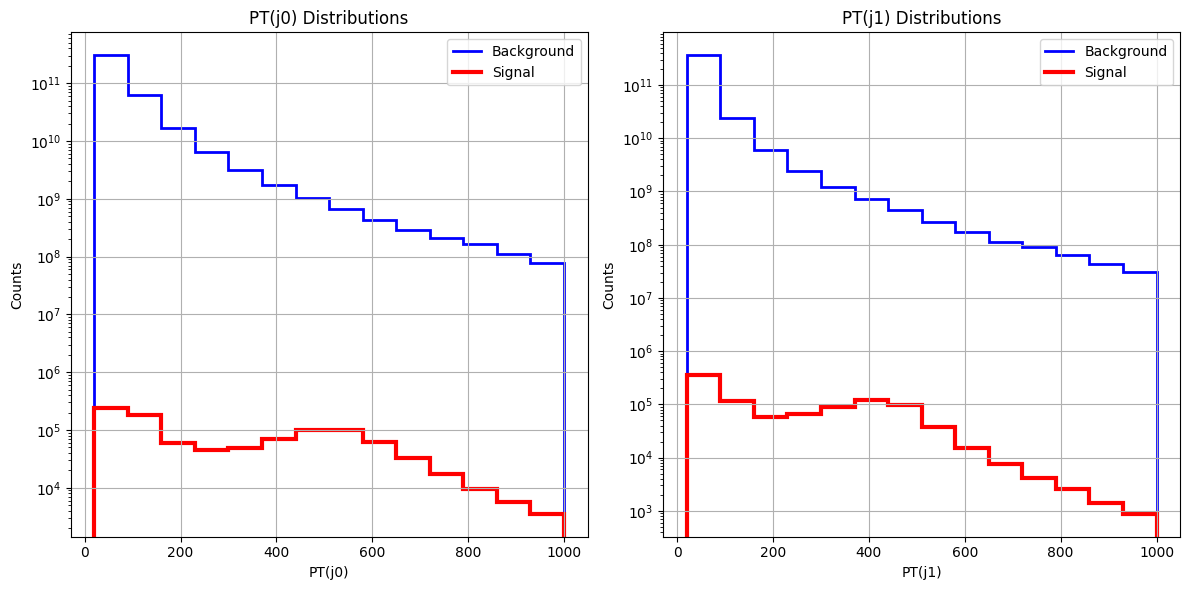

In [17]:
#Let's plot PtJ0, PTJ1 to get the relevant histograms
_,_, ptj0_hists, ptj1_hists = plot_functions.PlotJets("PT","PT",None,signal_weights,background_weightsWZ,"A1_PlotPTJets_noCuts")

Plotting Invariant Mass
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


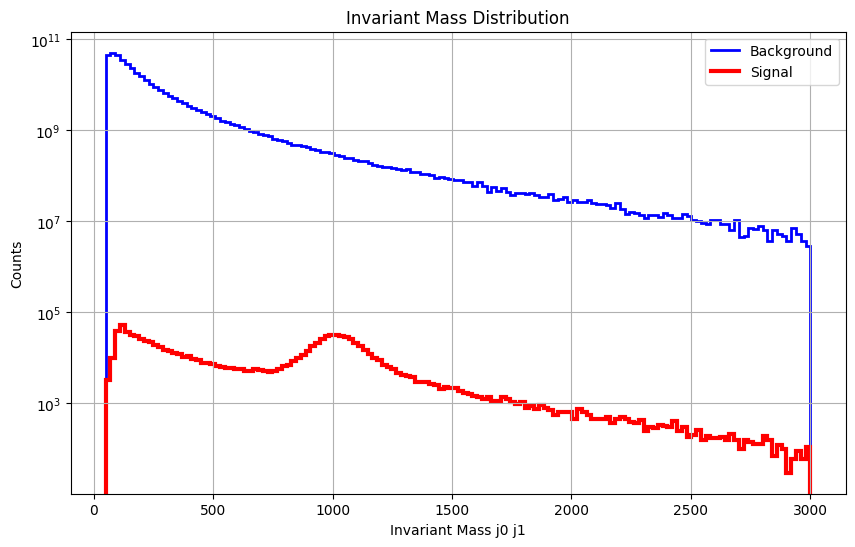

In [18]:
#We plot invariant mass to get background separated by Z and W
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents,_,_ = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_noCuts")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

In [20]:
#Store necessary data
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

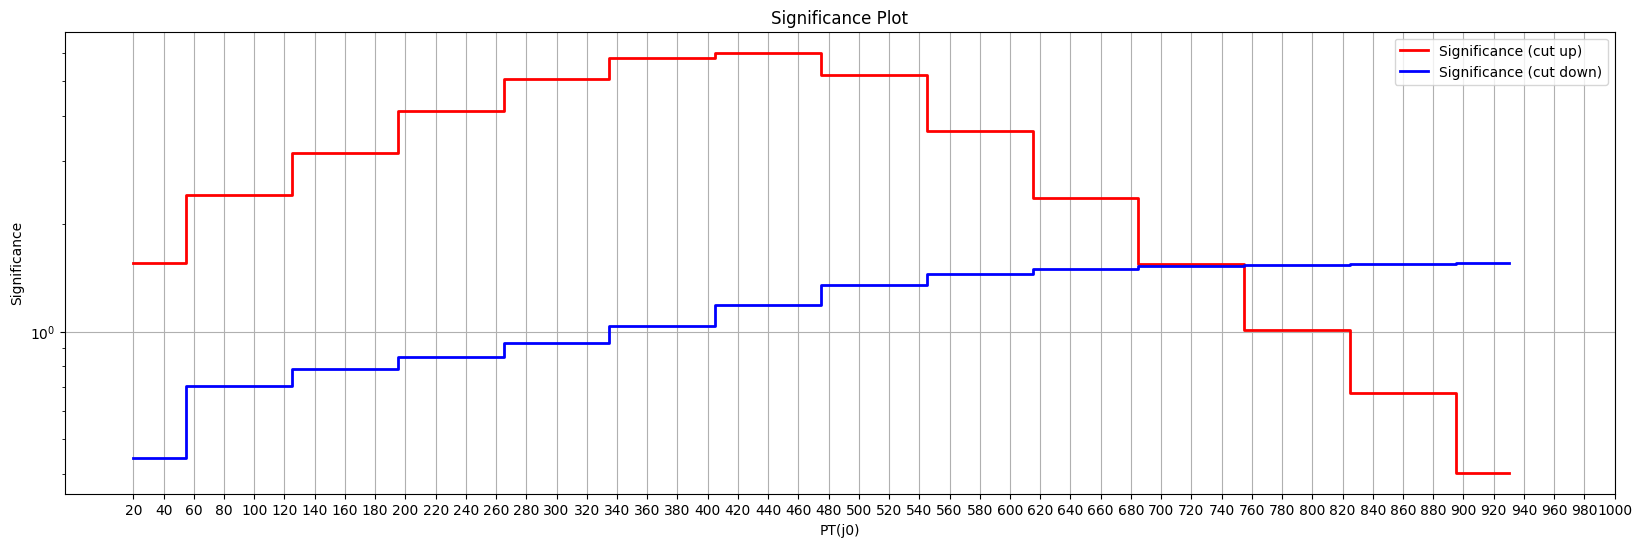

In [19]:
#PtJ0
plot_functions.significance_plot([0,1000], ptj0_hists[0],ptj0_hists[1],"j0")

So we select our cut at PT>405

<h2> Cut 1 : PT(j0) > 405</h2>

In [20]:
#Cut for eta(j0)*eta(j1) >=0
def mask_etaeta_condition(df):
    # Extract PT for j0 and j1
    pt_j0 = df["Jet.PT"].apply(lambda x: x[0] if len(x) > 1 else None)

    # Create mask where PT(j0) > 405 and PT(j1) > 405
    return (pt_j0 > 405)

maskList.append(mask_etaeta_condition)
cuts_strings.append("PT(j0) > 405")

<h1> Optimize Cut Using PT(j1) <h1>

Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


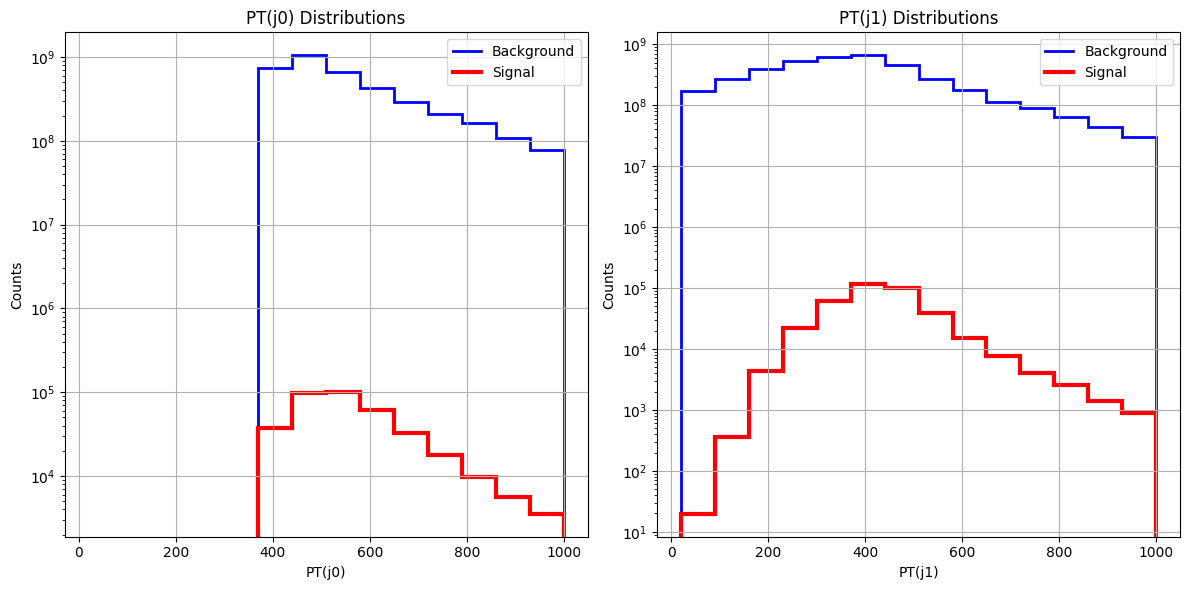

In [21]:
# Plot PT and get necessary data
_,_, ptj0_hists, ptj1_hists = plot_functions.PlotJets("PT","PT",maskList,signal_weights,background_weightsWZ,"A1_PlotPTJets_1Cut")

Plotting Invariant Mass
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


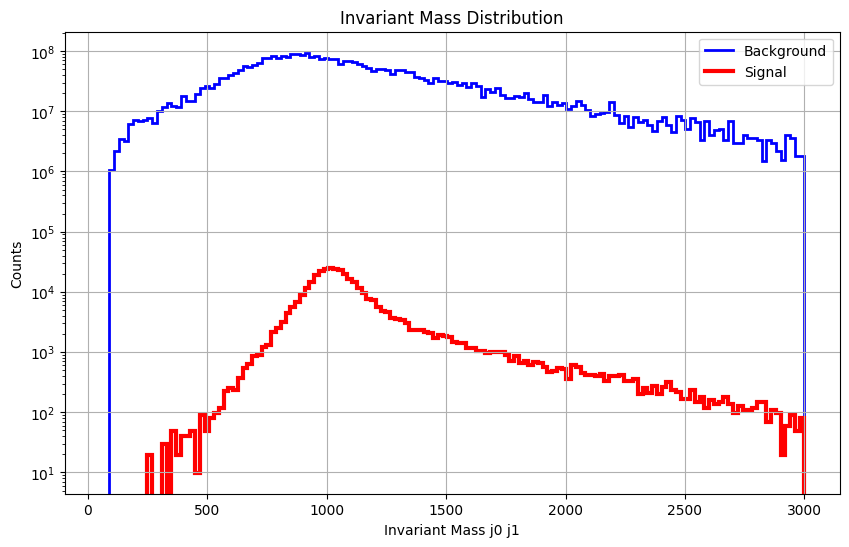

In [22]:
#We plot invariant mass to get background separated by Z and W
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents,_,_ = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_1Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

In [23]:
#Now store data
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

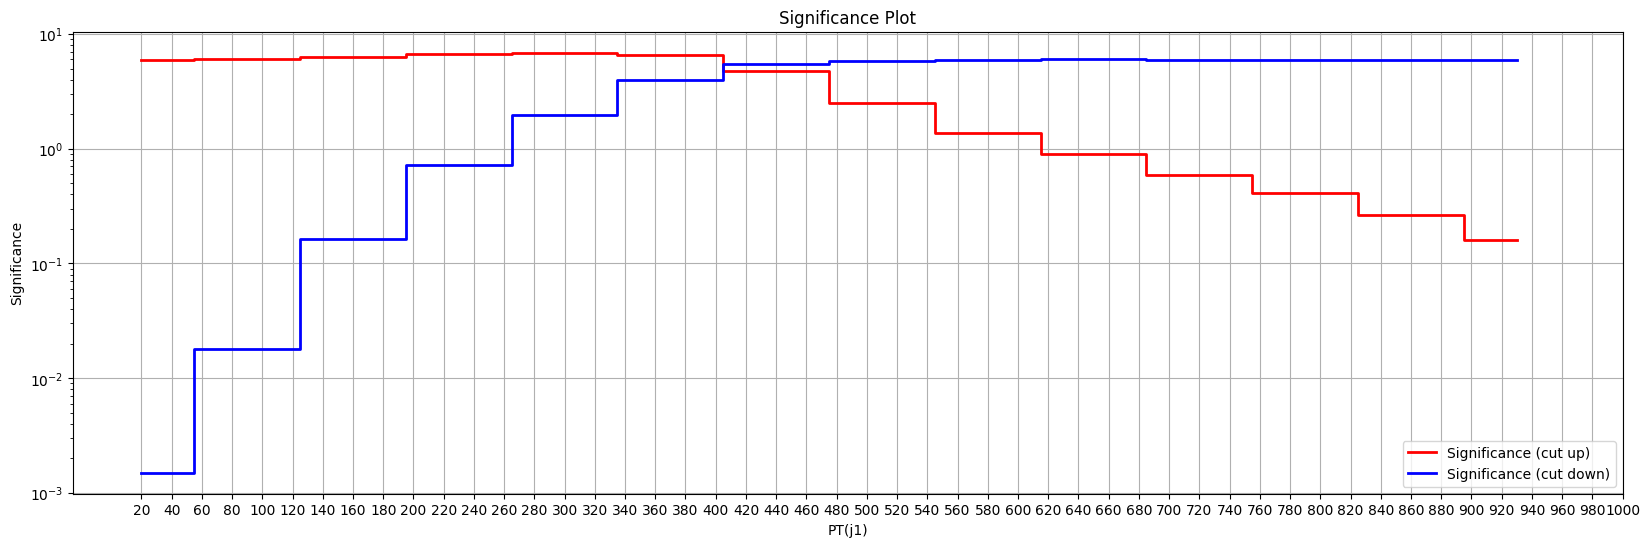

In [24]:
#Plot significances 
plot_functions.significance_plot([0,1000], ptj1_hists[0],ptj1_hists[1],"j1")

In [25]:
print("Current Sig Events: ", Signal_numevents)
print("Current Bkg Events: ", Background_numevents)
print("Current W Bkg Events: ", BkgW_numevents)
print("Current Z Bkg Events: ", BkgZ_numevents)
print("Current Significances: ", significances)

Current Sig Events:  [371268.4614599976]
Current Bkg Events:  [3927495139.0468774]
Current W Bkg Events:  [3876110452.149897]
Current Z Bkg Events:  [51384686.89698001]
Current Significances:  [np.float64(5.923927082048789)]


We decide our 2nd  cut to be PT(j1) > 340

<h2> Cut 2 : Pt(j1) > 265</h2>

In [29]:

def mask_pt_j1_condition(df):
    # Extract PT for j0
    pt_j1 = df["Jet.PT"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Create mask where PT(j1) > 340
    return pt_j1 > 260

maskList.append(mask_pt_j1_condition)
cuts_strings.append("Pt(j1) > 265")


<h1> Optimize 3rd Cut Using DeltaEta <h1>

Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


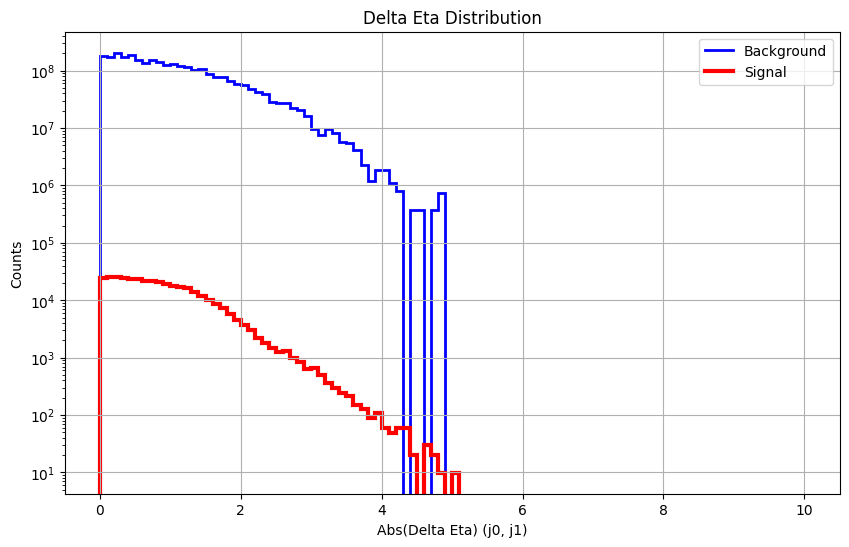

In [30]:
# Plot and store necessary calculations
deltaeta_signal_hist, deltaeta_bkg_hist = plot_functions.PlotDeltaEtaJets(maskList,signal_weights,background_weightsWZ,"A1_DeltaEta_2Cuts")


Plotting Invariant Mass
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


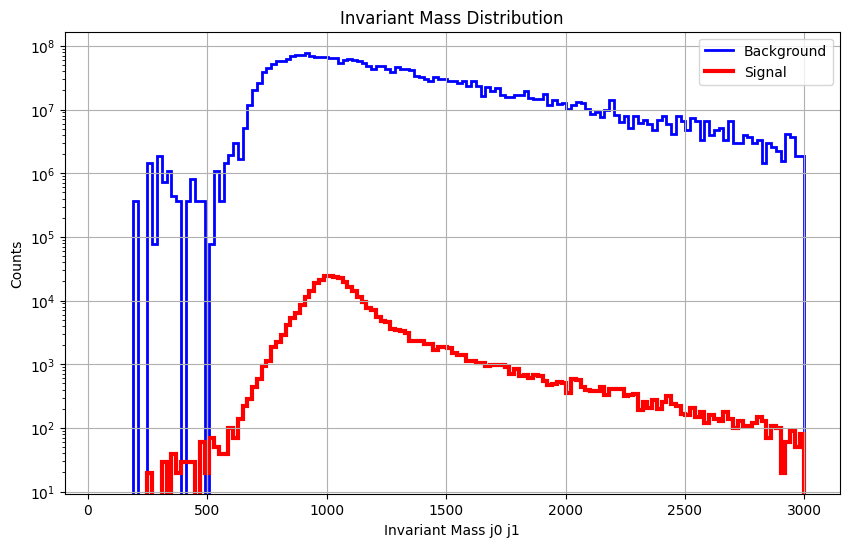

In [31]:
#We plot invariant mass to get background separated by Z and W
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents,_,_ = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_2Cuts")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

In [33]:
#Store necessary data
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

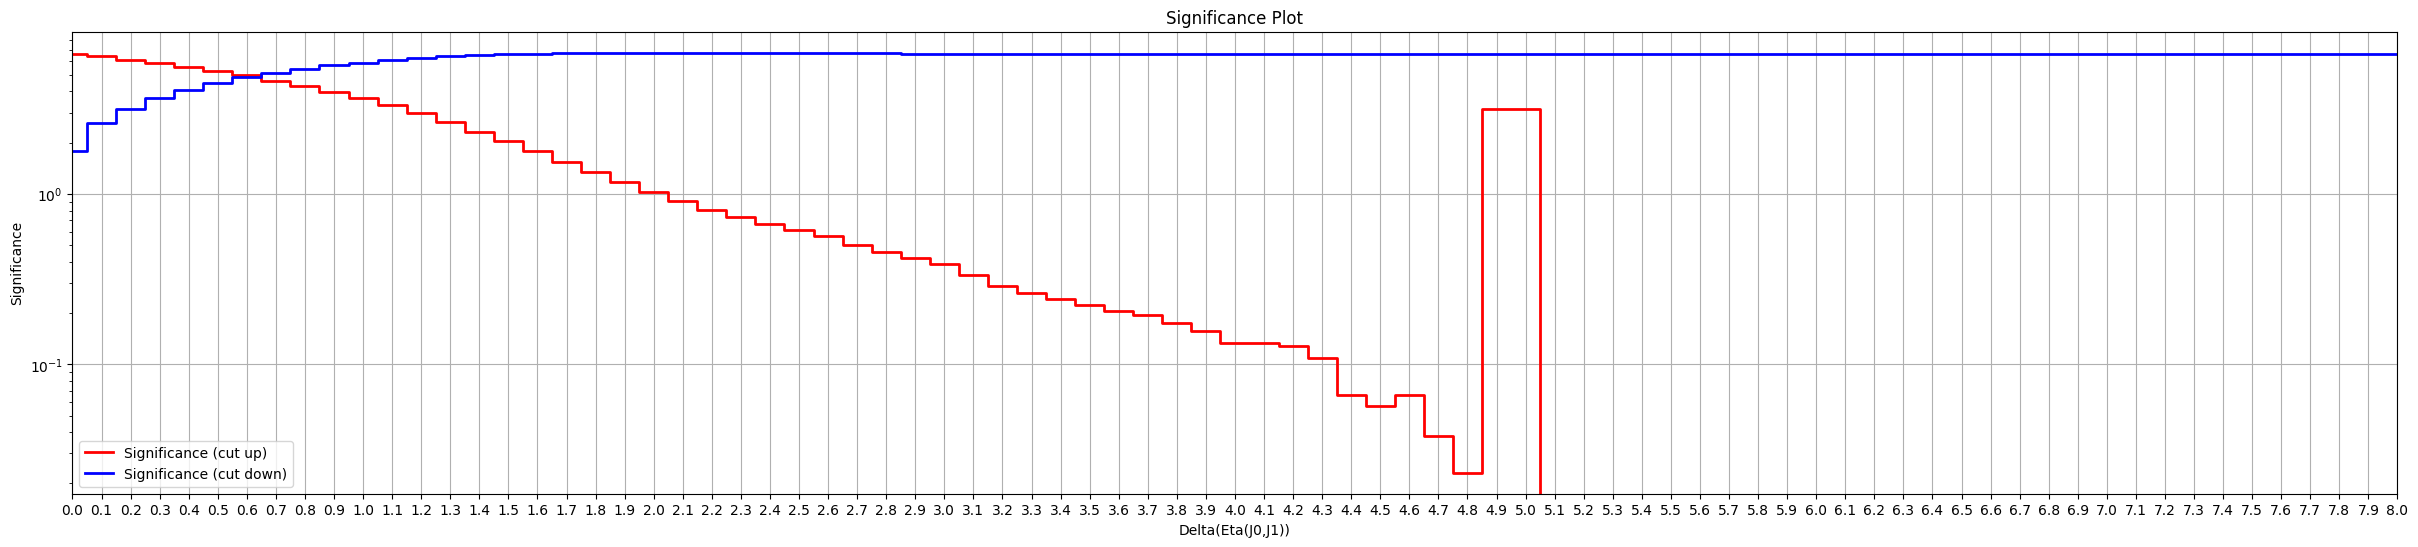

In [34]:
#Plot significances to find out cut
plot_functions.significance_plot([0,8], deltaeta_signal_hist,deltaeta_bkg_hist,"Delta(eta)")

<h2> Cut 3 : DeltaEta(J0,J1) < 1.45</h2>

In [35]:
## We choose PT(j0)>30
def mask_deltaeta_condition(df):
    # Extract PT for j0
    pt_j0 = df["Jet.Eta"].apply(lambda x: x[0] if len(x) > 1 else None)
    pt_j1 = df["Jet.Eta"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Create mask where DeltaEta < 1.45
    return np.abs(pt_j0 - pt_j1) < 1.45

maskList.append(mask_deltaeta_condition)
cuts_strings.append("DeltaEta < 1.45")


<h1> Optimize 4th Cut Using Invariant Mass<h1>

Plotting Invariant Mass


Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


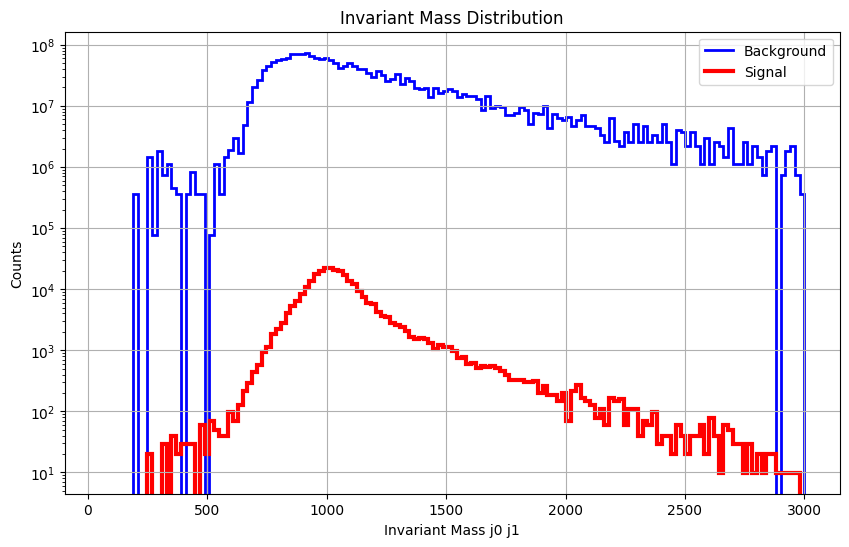

In [36]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents, invariant_signal_hist, invariant_bkg_hist = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_3Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)


In [37]:
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

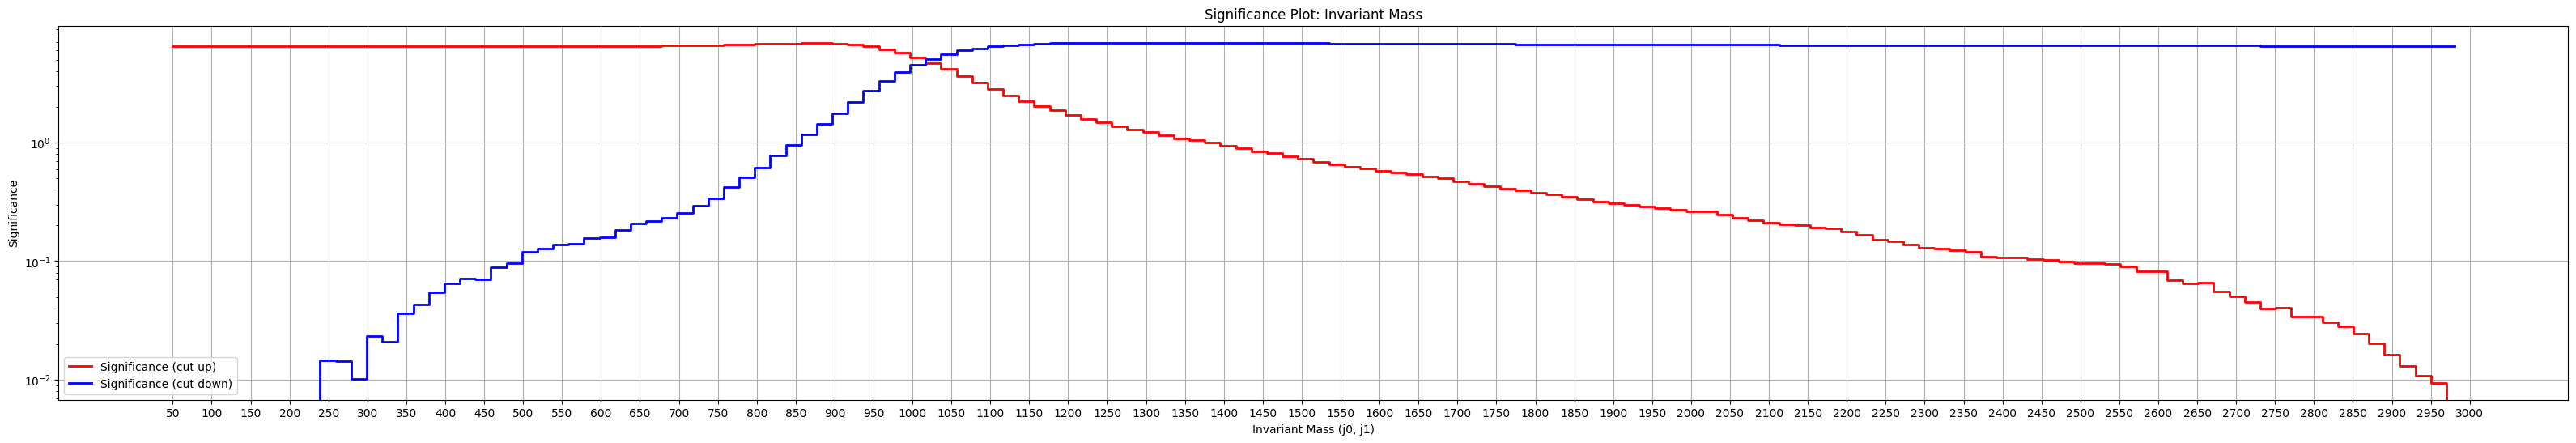

In [38]:
plot_functions.significance_plot([0,3500], invariant_signal_hist,invariant_bkg_hist,"Invariant")

<h2> Cut 4 : Invariant Mass < 1000</h2>

In [52]:
## We choose PT(j0)>30
def mask_invariant_mass_condition(df):
    # Extract PT, Eta, Phi, Mass for j0 and j1
    pt_j0 = df["Jet.PT"].apply(lambda x: x[0] if len(x) > 1 else None)
    pt_j1 = df["Jet.PT"].apply(lambda x: x[1] if len(x) > 1 else None)
    eta_j0 = df["Jet.Eta"].apply(lambda x: x[0] if len(x) > 1 else None)
    eta_j1 = df["Jet.Eta"].apply(lambda x: x[1] if len(x) > 1 else None)
    phi_j0 = df["Jet.Phi"].apply(lambda x: x[0] if len(x) > 1 else None)
    phi_j1 = df["Jet.Phi"].apply(lambda x: x[1] if len(x) > 1 else None)
    mass_j0 = df["Jet.Mass"].apply(lambda x: x[0] if len(x) > 1 else None)
    mass_j1 = df["Jet.Mass"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Calculate invariant mass for each event
    inv_mass = calculation_functions.calc_invariant_mass(
        pt0=np.array(pt_j0), eta0=np.array(eta_j0), phi0=np.array(phi_j0), m0=np.array(mass_j0),
        pt1=np.array(pt_j1), eta1=np.array(eta_j1), phi1=np.array(phi_j1), m1=np.array(mass_j1)
    )

    # Create mask where invariant mass < 1000
    return inv_mass < 1000

maskList.append(mask_invariant_mass_condition)
cuts_strings.append("InvariantMass < 1000")

In [56]:
import importlib

importlib.reload(calculation_functions)

<module 'calculation_functions' from '/home/phenoprojects/VBFDM_Analysis/Analysis/calculation_functions.py'>

Plotting Invariant Mass
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root
Error opening root file: /MC_Samples/Wlnu_jets/run_02.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_02.root
Error opening root file: /MC_Samples/Wlnu_jets/run_79.root
Ignoring root file: /MC_Samples/Wlnu_jets/run_79.root


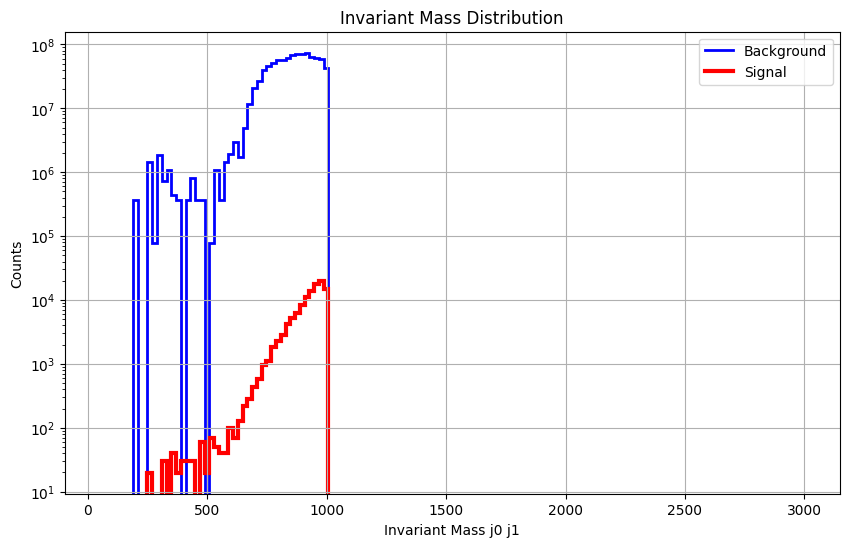

In [57]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents, invariant_signal_hist, invariant_bkg_hist = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_4Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

In [59]:
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

<h1> Final Table </h1>

In [ ]:
#Clear singla_numeventws, Background_Numevents, BkgW_numevents, BkgZ_numevents, significances, cuts_strings, maskList
'''
Signal_numevents=[]
cuts_strings=[]
Background_numevents=[]
BkgW_numevents=[]
BkgZ_numevents=[]
significances=[]
cuts_strings=[]
'''


In [ ]:

#Then add 3 rows to each with random numbers
'''
Signal_numevents.append(100)
Signal_numevents.append(150)
Signal_numevents.append(200)

Background_numevents.append(1000)
Background_numevents.append(800)
Background_numevents.append(600)

BkgW_numevents.append(600)
BkgW_numevents.append(500)
BkgW_numevents.append(400)

BkgZ_numevents.append(400)
BkgZ_numevents.append(300)
BkgZ_numevents.append(200)

significances.append(3)
significances.append(5)
significances.append(7)

cuts_strings.append("Cut 1")
cuts_strings.append("Cut 2")
cuts_strings.append("Cut 3")
'''


In [ ]:
print("Sig Events: ", Signal_numevents)
print("Bkg Events: ", Background_numevents)
print("W Bkg Events: ", BkgW_numevents)
print("Z Bkg Events: ", BkgZ_numevents)
print("Significances: ", significances)
print("Cuts: ", cuts_strings)

Current Sig Events:  [371268.4614599976, 360444.45215999766, 360444.45215999766, 300027.698879998, 112421.42261999921]
Current Bkg Events:  [3927495139.0468774, 2879238725.0665407, 2879238725.0665407, 2113241979.2445605, 905656509.6209801]
Current W Bkg Events:  [3876110452.149897, 2858107844.7189207, 2858107844.7189207, 2098738865.7956405, 897313320.7014401]
Current Z Bkg Events:  [51384686.89698001, 21130880.347620003, 21130880.347620003, 14503113.44892, 8343188.91954]
Current Significances:  [np.float64(5.923927082048789), np.float64(6.716953249327352), np.float64(6.716953249327352), np.float64(6.526132832539535), np.float64(3.7354279739493728)]


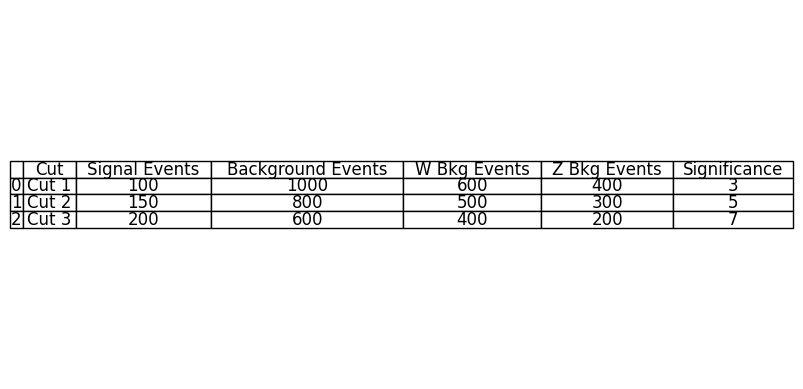

In [5]:
plot_functions.Get_Table(Signal_numevents,Background_numevents,BkgW_numevents,BkgZ_numevents,significances, cuts_strings)